In [17]:
import SimpleITK as sitk
import numpy as np
import sigpy as sp
from sigpy import mri
from sigpy import plot
import matplotlib.pyplot as plt

sitk_t1 = sitk.ReadImage('t1.nii.gz') 
t1 = sitk.GetArrayFromImage(sitk_t1)

print(t1.shape)

(2, 1, 90, 256, 256)


In [8]:

# CPU convolve
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 1, 1])
z = sp.convolve(x, y)

(40, 256, 2)


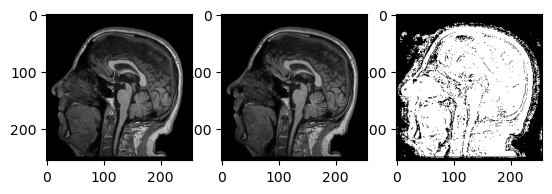

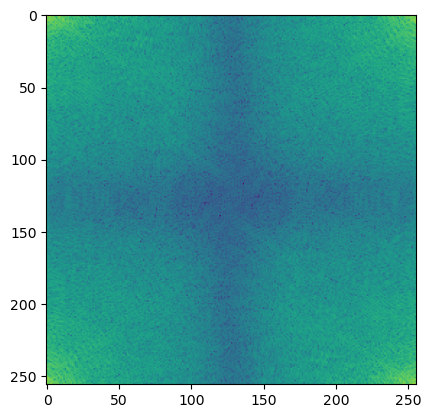

In [166]:
# 1. Simulation of radial sampling: (15%)
spikes = 40
coord = sp.mri.radial([spikes,256,2],[256,256], dtype=int)

plt.figure()
plt.subplot(131)
plt.imshow(t1[0,0,45,:,:], cmap='gray')

plt.subplot(132)
plt.imshow(t1[1,0,45,:,:], cmap='gray')

plt.subplot(133)
plt.imshow(t1[1,0,45,:,:] - t1[0,0,45,:,:], cmap='gray')

print(coord.shape)

img=t1[0,0,45,:,:]

fft_img = sp.fft(img, center=False)
plt.figure()
plt.imshow(np.log10(abs(fft_img)))
plt.show()


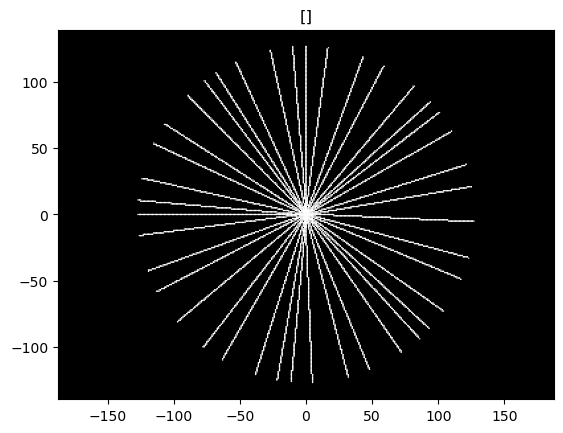

In [167]:
sp.plot.ScatterPlot(coord)

C:\Users\Tedi\AppData\Local\Temp\ipykernel_20496\2439783997.py:8: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(abs(new_fft)))


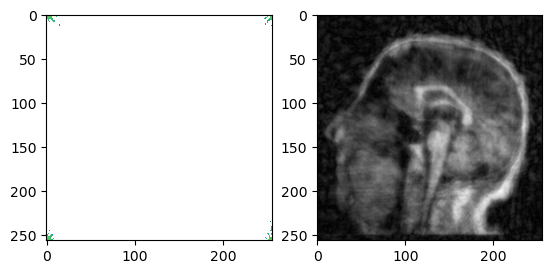

In [169]:
new_fft = np.zeros_like(fft_img)
new_fft[coord[:,:,1],coord[:,:,0]] = fft_img[coord[:,:,1],coord[:,:,0]]

new_ifft = sp.ifft(new_fft, center=False)

plt.figure()
plt.subplot(121)
plt.imshow(np.log10(abs(new_fft)))

plt.subplot(122)
plt.imshow(abs(new_ifft), cmap='gray')
plt.show()